In [4]:
%pylab inline
import cv2
import numpy as np
import pydicom as dicom
import pandas as pd
import sys, os
from pathlib import Path


Bad key savefig.frameon in file /home/frfa/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/frfa/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/frfa/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an update

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Inserting siebling folder to sys. Ensures other code can be ran
# Note: Must have end2end-all-conv folder in the parent of the current folder
github_path = "../../end2end-all-conv"
sys.path.insert(1, os.path.abspath(github_path))

In [6]:
from dm_image import get_prob_heatmap
import keras
from keras.models import load_model

Using TensorFlow backend.
/home/frfa/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
# Define arguments
img_list = "../../data/cbis-ddsm/all_test_img/Mass-Test_P_00576_LEFT_MLO.png"
target_height = 896
target_scale = 255
patch_size = 224
stride = 32
roi_model = load_model('../../end2end-all-conv/trained_models/ddsm_patch_state/s30_vgg19.h5')
batch_size = 1





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead







2022-05-04 11:34:28.655972: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-05-04 11:34:28.701641: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2208000000 Hz
2022-05-04 11:34:28.707011: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fffc6bb9620 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-04 11:34:28.707193: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-05-04 11:34:28.729997: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-04 11:34:28.741357: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-04 11:34:28.741501: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156]



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



In [9]:
heatmap_list, preprocessed_img, original_img = get_prob_heatmap(
    img_list = img_list,
    target_height = target_height,
    target_scale = target_scale,
    patch_size = patch_size,
    stride = stride,
    model = roi_model,
    batch_size = batch_size
)

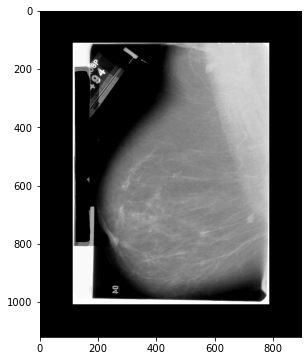

In [73]:
fig,ax = subplots()
fig.set_size_inches([6, 6])
ax.imshow(preprocessed_img, cmap='gray')

In [74]:
preprocessed_img.shape

(1120, 897)

In [12]:
# sweep variables
nb_row = round(float(preprocessed_img.shape[0] - patch_size)/stride + .49)
nb_col = round(float(preprocessed_img.shape[1] - patch_size)/stride + .49)
nb_row = int(nb_row)
nb_col = int(nb_col)
sweep_hei = patch_size + (nb_row - 1)*stride
sweep_wid = patch_size + (nb_col - 1)*stride
y_gap = int((preprocessed_img.shape[0] - sweep_hei)/2)
x_gap = int((preprocessed_img.shape[1] - sweep_wid)/2)

In [62]:
nb_row, nb_col, x_gap, y_gap, sweep_hei, sweep_wid

(28, 22, 0, 16, 1088, 896)

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [36]:
preprocessed_img.shape

(1120, 897)

Text(0.5, 1.0, 'Malignant Heatmap')

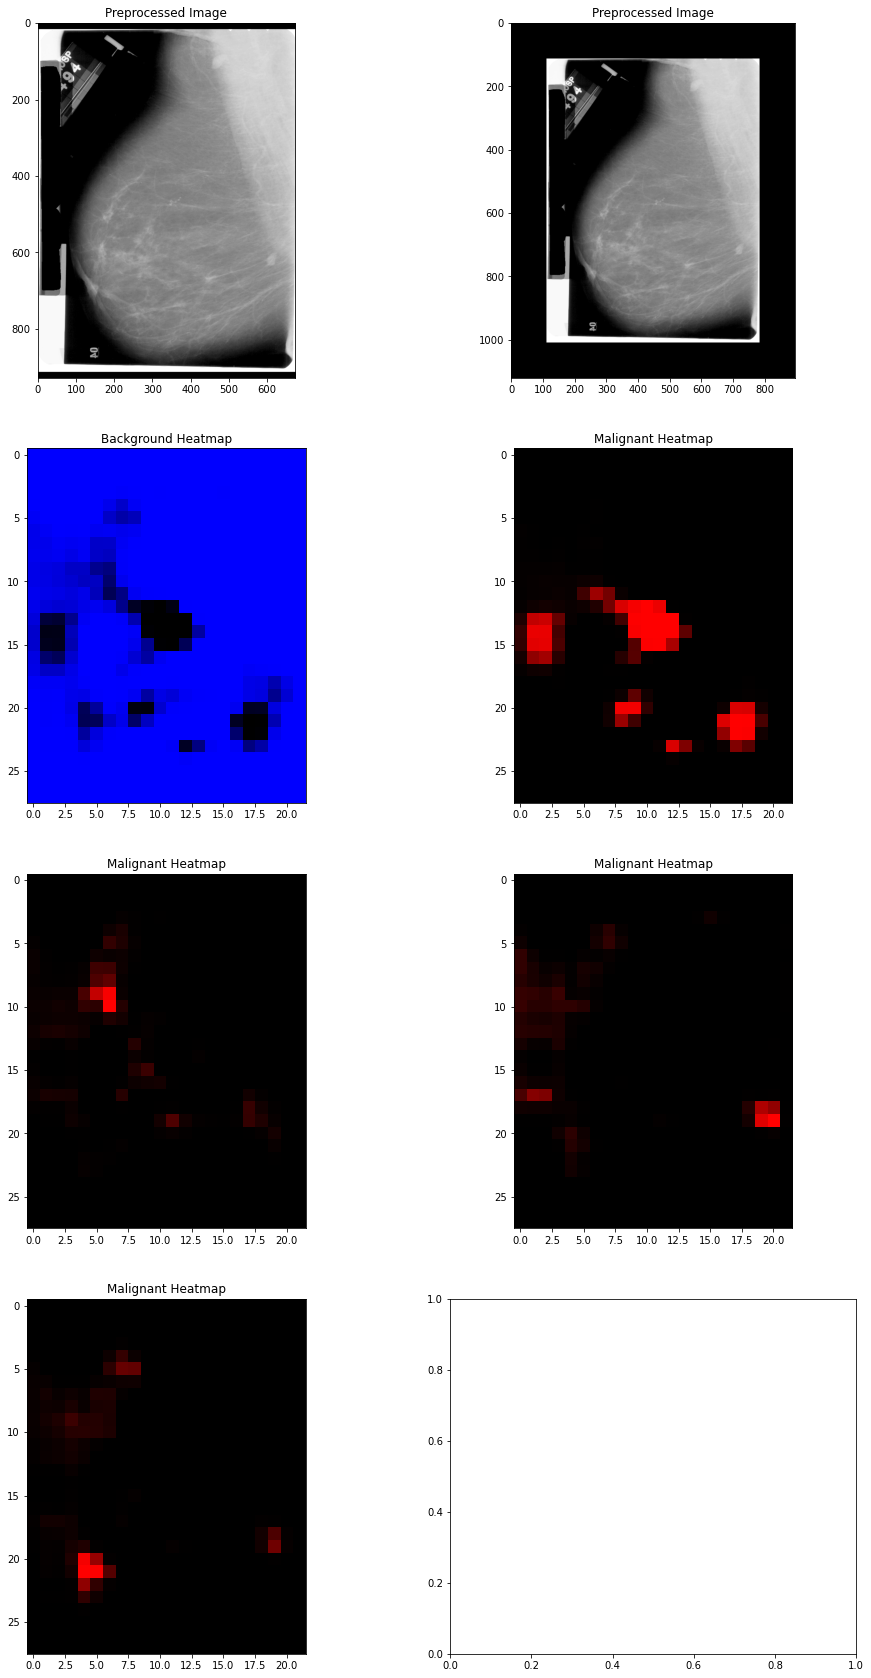

In [76]:
fig, axes = plt.subplots(4, 2, figsize=(16, 30))

axes[0][0].imshow(preprocessed_img[
    int(patch_size / 2 - y_gap):int(preprocessed_img.shape[0] - patch_size/2 + y_gap),
    int(patch_size / 2 - x_gap):int(preprocessed_img.shape[1] - patch_size/2 + x_gap)
], cmap="gray")
axes[0][0].set_title("Preprocessed Image")

axes[0][1].imshow(preprocessed_img, cmap="gray")
axes[0][1].set_title("Preprocessed Image")

axes[1][0].imshow(heatmap_list[:,:,0], cmap=LinearSegmentedColormap.from_list("background", [(0, 0, 0), (0, 0, 1)]))
axes[1][0].set_title("Background Heatmap")

axes[1][1].imshow(heatmap_list[:,:,1], cmap=LinearSegmentedColormap.from_list("malignant", [(0, 0, 0), (1, 0, 0)]))
axes[1][1].set_title("Malignant Heatmap")

axes[2][0].imshow(heatmap_list[:,:,2], cmap=LinearSegmentedColormap.from_list("malignant", [(0, 0, 0), (1, 0, 0)]))
axes[2][0].set_title("Malignant Heatmap")

axes[2][1].imshow(heatmap_list[:,:,3], cmap=LinearSegmentedColormap.from_list("malignant", [(0, 0, 0), (1, 0, 0)]))
axes[2][1].set_title("Malignant Heatmap")

axes[3][0].imshow(heatmap_list[:,:,4], cmap=LinearSegmentedColormap.from_list("malignant", [(0, 0, 0), (1, 0, 0)]))
axes[3][0].set_title("Malignant Heatmap")

axes[0][0].imshow(preprocessed_img[
    int((preprocessed_img.shape[0] - sweep_hei) / 2):int((preprocessed_img.shape[0] - sweep_hei),
    sweep_wid
], cmap="gray")
axes[0][0].set_title("Preprocessed Image")

In [44]:
(patch_size/2)-x_gap

112.0

In [52]:
preprocessed_img.shape[0] - int(preprocessed_img.shape[0] - patch_size + y_gap)

208

In [65]:
preprocessed_img.shape[0] - patch_size

896

In [67]:
int(preprocessed_img.shape[0] - patch_size + y_gap)

912

In [70]:
preprocessed_img[
    int(patch_size / 2 - y_gap):800, #int(preprocessed_img.shape[0] - patch_size + y_gap),
    int(patch_size / 2 - x_gap):int(preprocessed_img.shape[1] - patch_size + x_gap)
].shape

(704, 561)

In [71]:
int(patch_size / 2 - y_gap)

96

In [72]:
int(preprocessed_img.shape[0] - (patch_size/2) + y_gap)

912